## Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm
import scipy
import seaborn as sns

## Funciones

In [58]:
def EulerMaruyamaOrnstein(n,dt,mu,sigma): # n es el numero de componentes del array X, el proceso va a terminar en t_{n-1}
    X=np.zeros(n)
    X[0]=np.random.normal(0,(sigma_0)/np.sqrt(2*mu_0))
    for i in range(n-1):
      dBt = np.random.normal(0,np.sqrt(dt))
      X[i+1] = X[i]-mu*X[i]*dt+sigma*dBt
    return X
def CovEmpirica(X,k):
    sum=0
    n=X.shape[0]
    X_bar = np.mean(X)
    return np.mean((X[:n-k]-X_bar)*(X[-(n-k):]-X_bar))

def Wasserstein(theta, X_obs): # Calcula la distancia entre las observaciones X_obs y el OU de parametro theta=[mu,sigma]
    mu = theta[0]
    sigma = theta[1]
    n = X_obs.shape[0] #n observaciones
    X_tilde=np.sort(X)
    q=np.linspace(0,1,n+1)
    return np.mean(X_tilde**2) + (sigma**2)/((2*mu))-2*sigma*np.sum(X_tilde*(norm.pdf(norm.ppf(q))[:-1]-norm.pdf(norm.ppf(q))[1:] ))/(np.sqrt(2*mu))

## Euler Maruyama

En el siguiente codigo se simula un $OU(1,5)$ usando $\Delta t = 1/100$ y $n=5000$ pasos. Además, se compara su densidad con la de una normal de media $0$ y desviación estandar $\frac{5}{\sqrt{2}}$

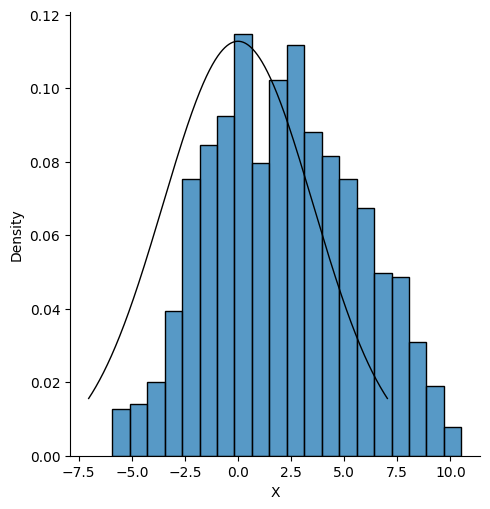

In [59]:
mu_0=1
sigma_0=5
dt=1/100
n=2000
rv = norm(0,5/np.sqrt(2))
np.random.seed(42) #semilla
X = EulerMaruyamaOrnstein(n,dt,mu_0,sigma_0)
x = np.linspace(norm.ppf(0.000000000001),
                norm.ppf(0.999999999999), 1000)
sns.displot(X, stat="density", common_norm=False)
plt.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf')
plt.xlabel('X')
plt.show()

En la siguiente se aumentan los pasos a $n=100000$

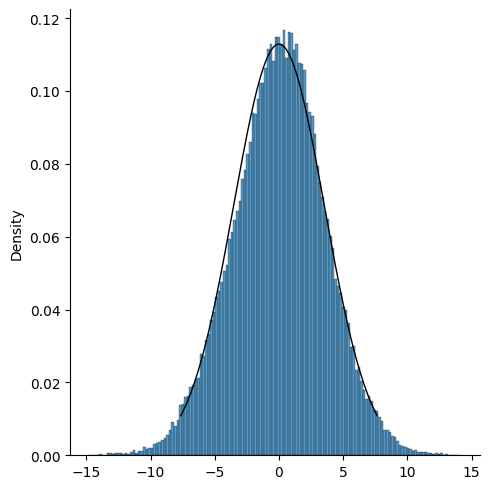

In [60]:
mu_0=1
sigma_0=5
dt=1/100
n=100000
rv = norm(0,5/np.sqrt(2))
np.random.seed(42) #semilla
X = EulerMaruyamaOrnstein(n,dt,mu_0,sigma_0)
x = np.linspace(norm.ppf(0.00000000000001),
                norm.ppf(0.99999999999999), 1000)
sns.displot(X, stat="density", common_norm=False)
plt.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf')
plt.show()

Volviendo al caso $n=5000$, cambiemos $\Delta t$ por $1/24$

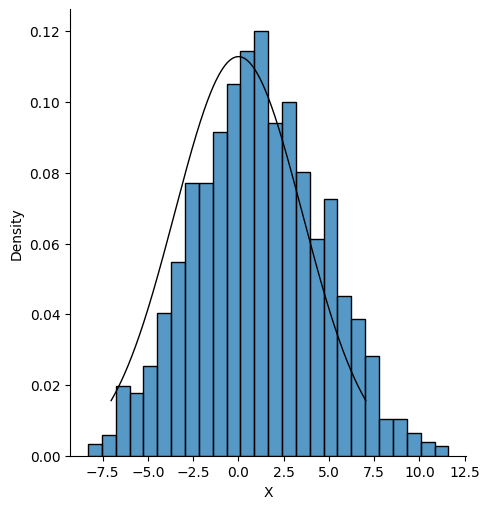

In [61]:
mu_0=1
sigma_0=5
dt=1/24
n=2000
rv = norm(0,5/np.sqrt(2))
np.random.seed(42) #semilla
X = EulerMaruyamaOrnstein(n,dt,mu_0,sigma_0)
x = np.linspace(norm.ppf(0.000000000001),
                norm.ppf(0.999999999999), 1000)
sns.displot(X, stat="density", common_norm=False)
plt.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf')
plt.xlabel('X')
plt.show()

## Metrica de Wasserstein

Veamos la metrica entre $X\sim OU(1,5)$ y la normal $\mathcal{N}(0,25/2)$ para distintos $n$ y con $dt=1/24$

In [62]:
mu_0=1
sigma_0=5
dt=1/24
n=2000
was = []
for n in [2000,10000,100000]:
    np.random.seed(42) #semilla
    X = EulerMaruyamaOrnstein(n,dt,mu_0,sigma_0)
    was.append([Wasserstein([1,5],X),n])
wass_results = pd.DataFrame(was, columns =['W_2^2','n'], dtype = float)
wass_results

,W_2^2,n
0,1.187874,2000.0
1,0.012936,10000.0
2,0.008755,100000.0


Vemos que a medida que $n$ crece, el valor tiende a 0.